In [1]:
# Early WIP

In [2]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, 
    WheelZoomTool, BoxSelectTool
)

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main colour
# SC = 'red'  # Secondary colour
SC = '#ededed'

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
})


Loading BokehJS ...

In [ ]:
df = pd.read_csv(ZipFile('data/college-salaries.zip').open('degrees-that-pay-back.csv'))
df.head(3)

In [10]:
df = pd.read_csv(ZipFile('data/college-salaries.zip').open('degrees-that-pay-back.csv'))

# Using columns' names easiert to work with. 
# 50 - median, 10 - 10th percentile. Bgn - starting Salary. Mid - Mid-carreer.
# Camel Case notation.
df.columns = ['Major','Bgn50','Mid50','DeltaBgnMid','Mid10','Mid25','Mid75','Mid90']

mid_cols = ['Mid10', 'Mid25', 'Mid50', 'Mid75', 'Mid90']
major = 'Major'

df.set_index('Major', inplace=True)
df.sort_values('Bgn50', inplace=True)

# Changing dolar values into floats
def to_float(x):
    x_str = x.replace('$', '').replace(',', '.')[:-3].replace('.','')
    return float(x_str)
for col in df.drop('DeltaBgnMid', axis=1).columns:
    df[col] = df[col].apply(to_float)

df.head(2)

,Bgn50,Mid50,DeltaBgnMid,Mid10,Mid25,Mid75,Mid90
Major,,,,,,,
Spanish,"34,000.00","53,100.00",56.20,"31,000.00","40,000.00","76,800.00","96,400.00"
Religion,"34,100.00","52,000.00",52.50,"29,700.00","36,500.00","70,900.00","96,400.00"


In [11]:
df.shape

(50, 7)

In [19]:
df.columns

Index(['Bgn50', 'Mid50', 'DeltaBgnMid', 'Mid10', 'Mid25', 'Mid75', 'Mid90'], dtype='object')

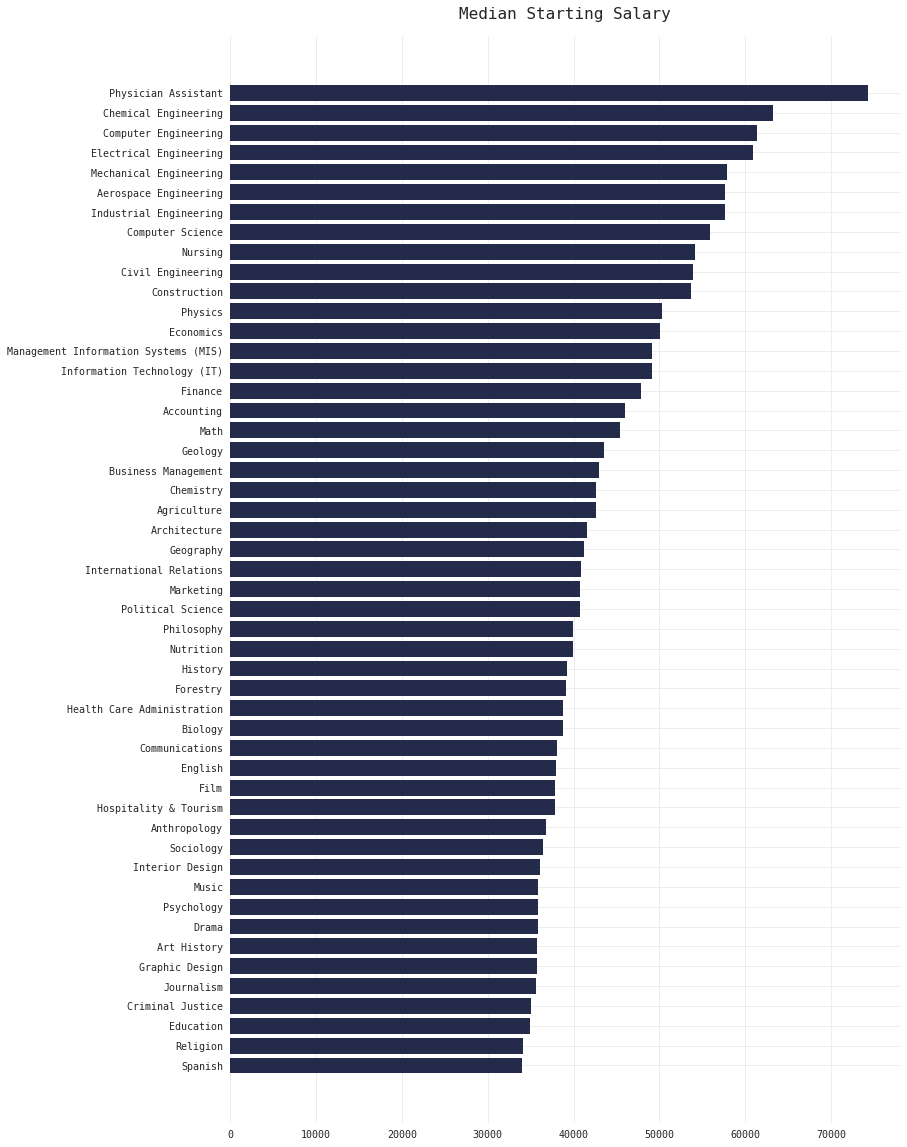

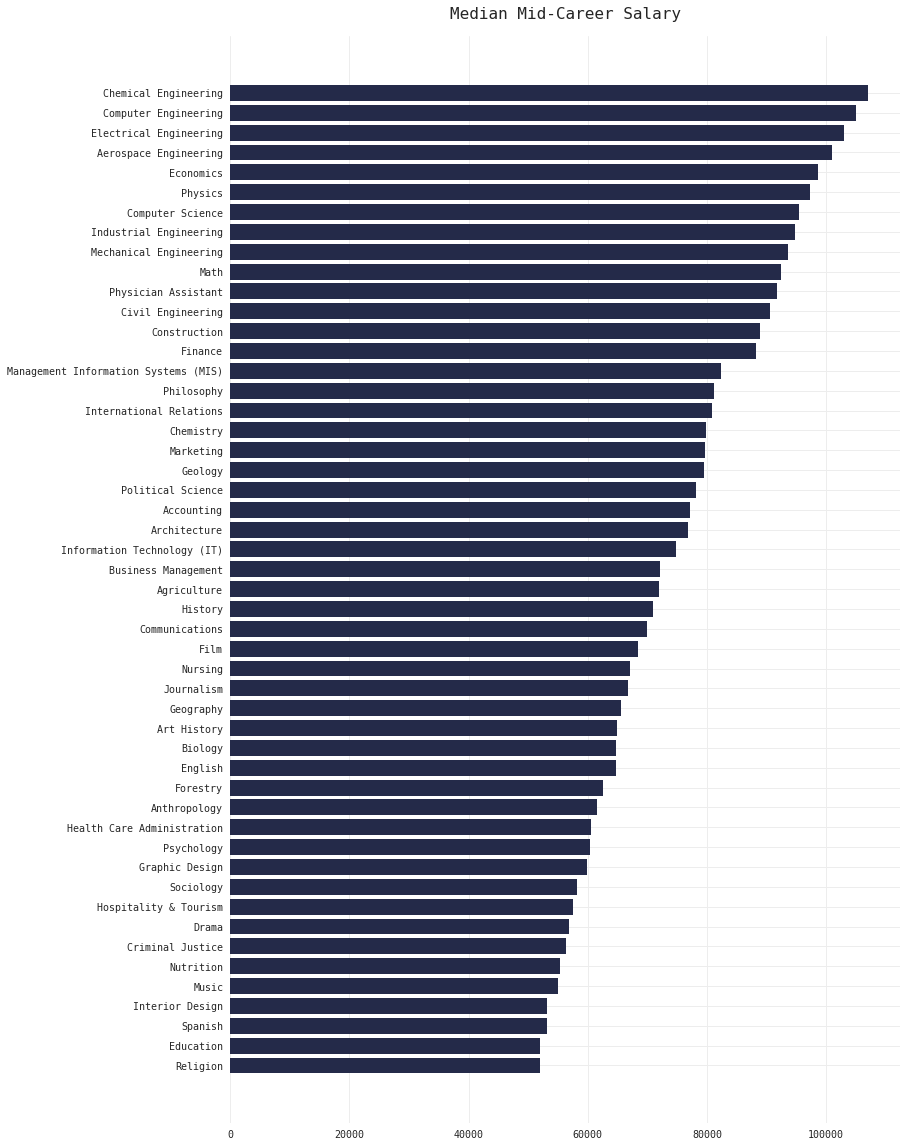

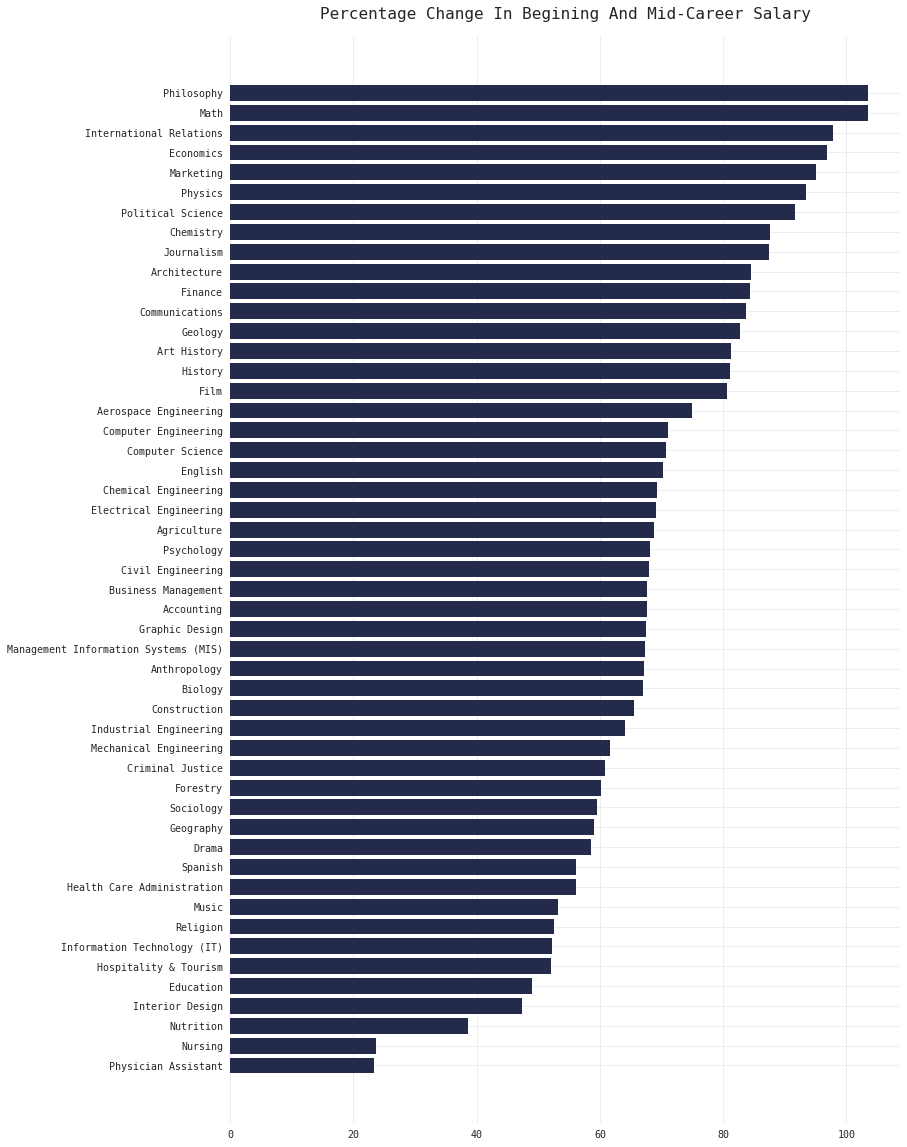

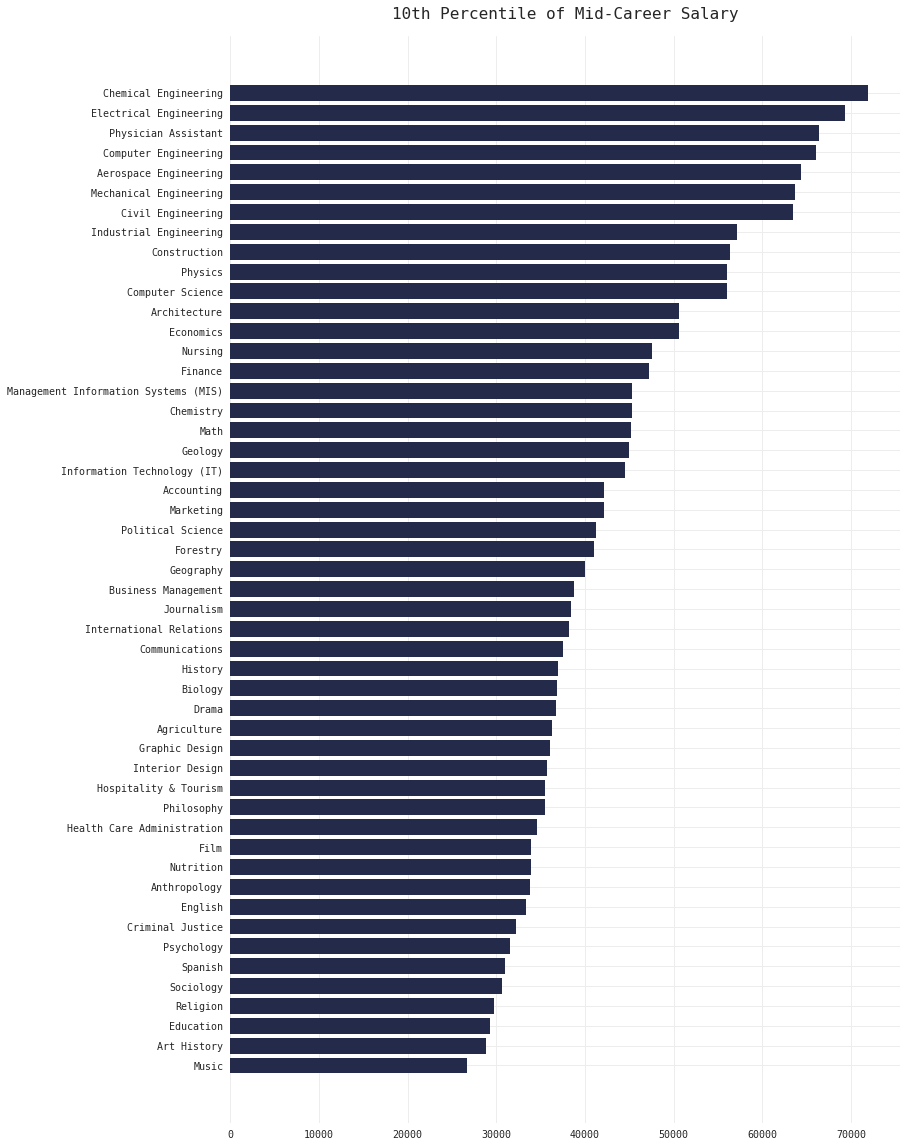

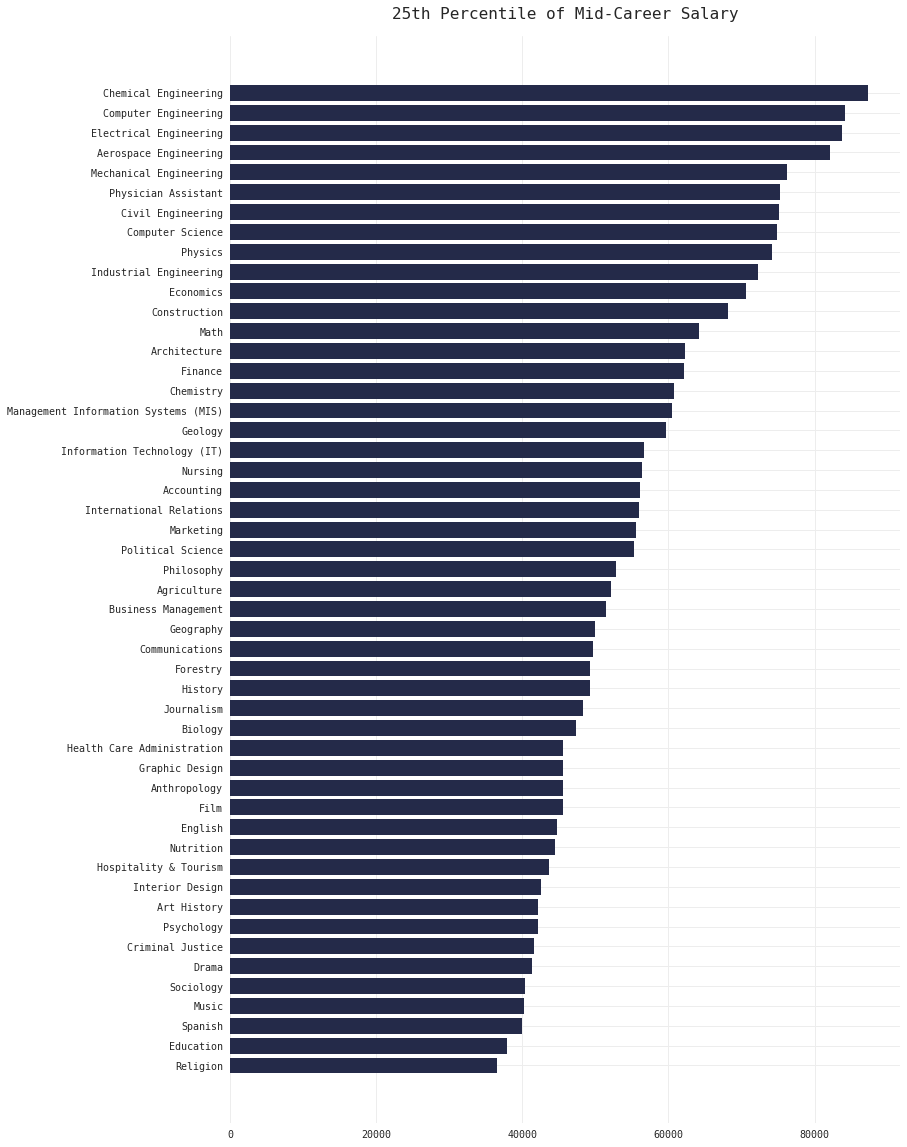

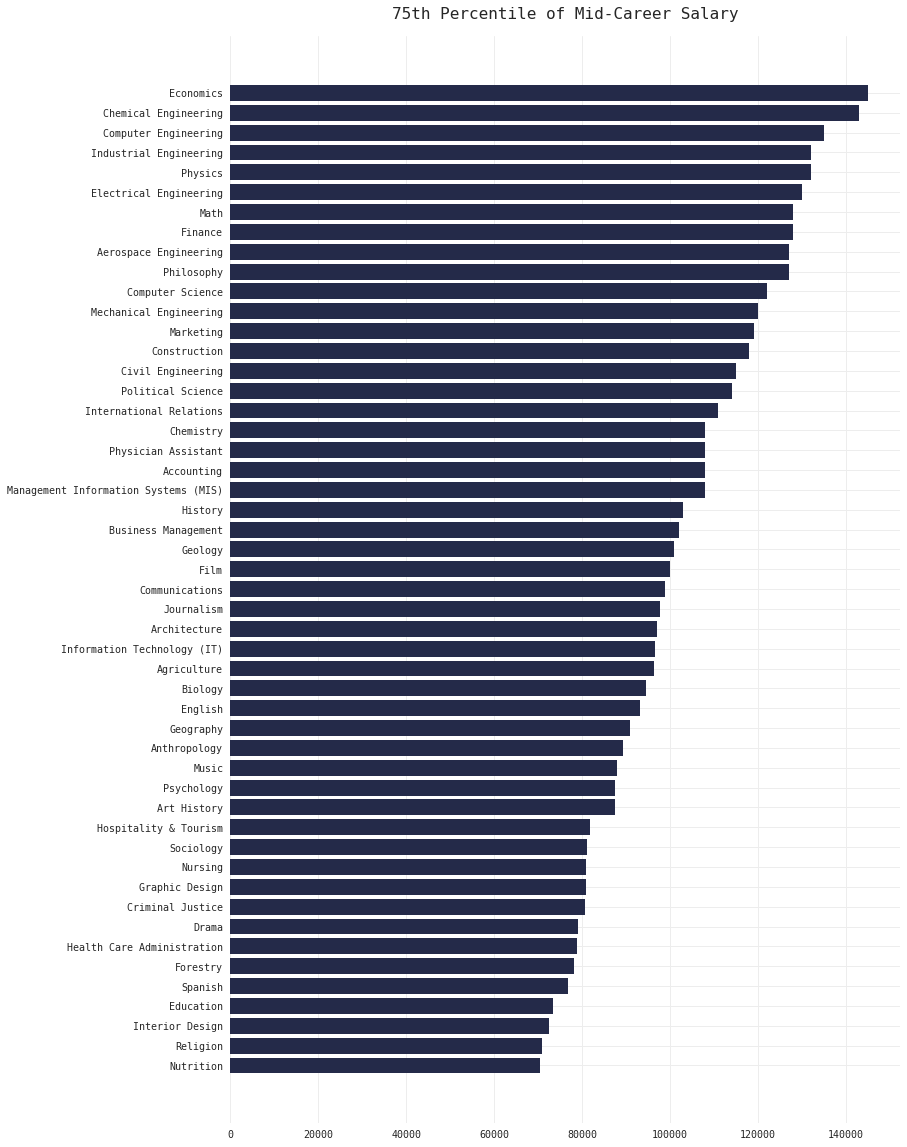

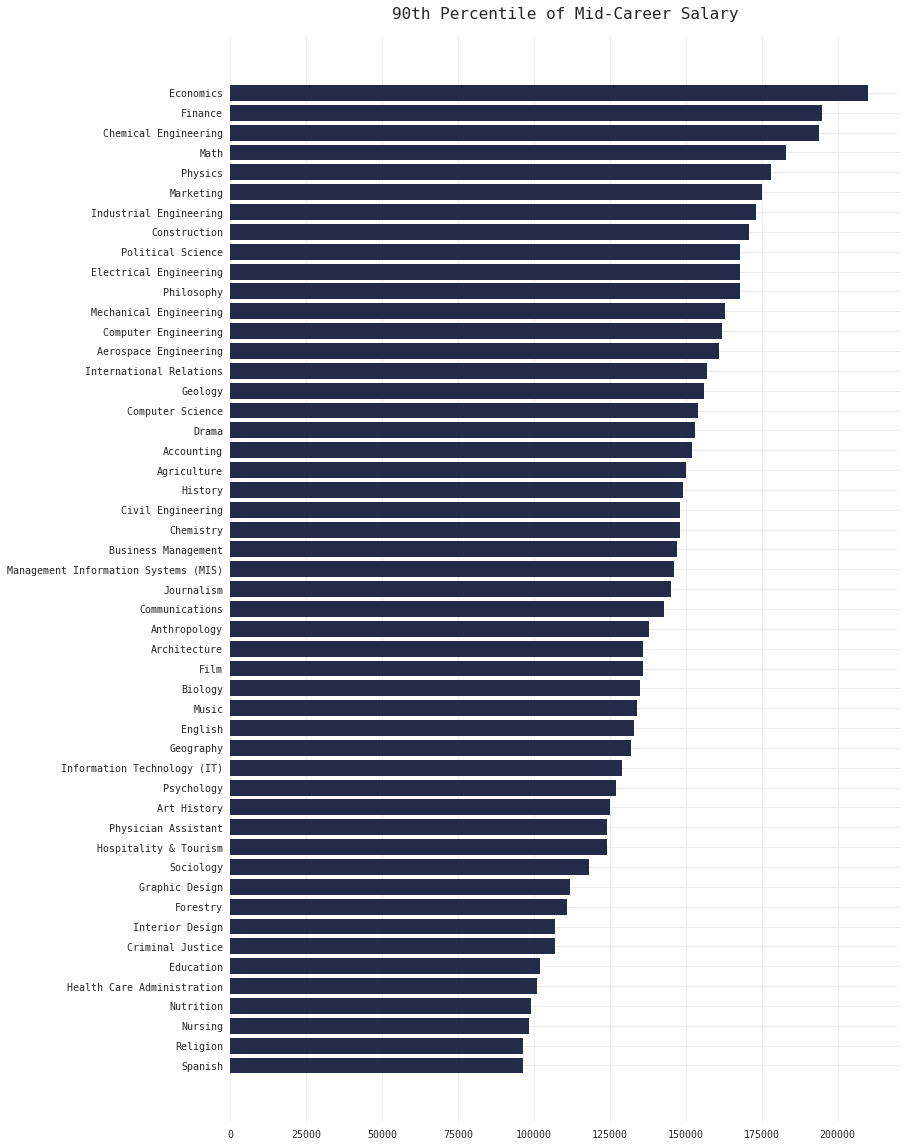

In [25]:
title_dict = {
    'Bgn50': 'Median Starting Salary',
    'Mid50': 'Median Mid-Career Salary',
    'DeltaBgnMid': 'Percentage Change In Begining And Mid-Career Salary',
    'Mid10': '10th Percentile of Mid-Career Salary',
    'Mid25': '25th Percentile of Mid-Career Salary',
    'Mid75': '75th Percentile of Mid-Career Salary',
    'Mid90': '90th Percentile of Mid-Career Salary',
}

for col in df.columns:
    temp_df = df[col].sort_values()
    plt.figure(figsize=(12, 20))
    plt.barh(range(temp_df.shape[0]), temp_df.values, color=MC)
    plt.yticks(range(temp_df.shape[0]), temp_df.index);
    plt.title(title_dict[col], y=1.01);

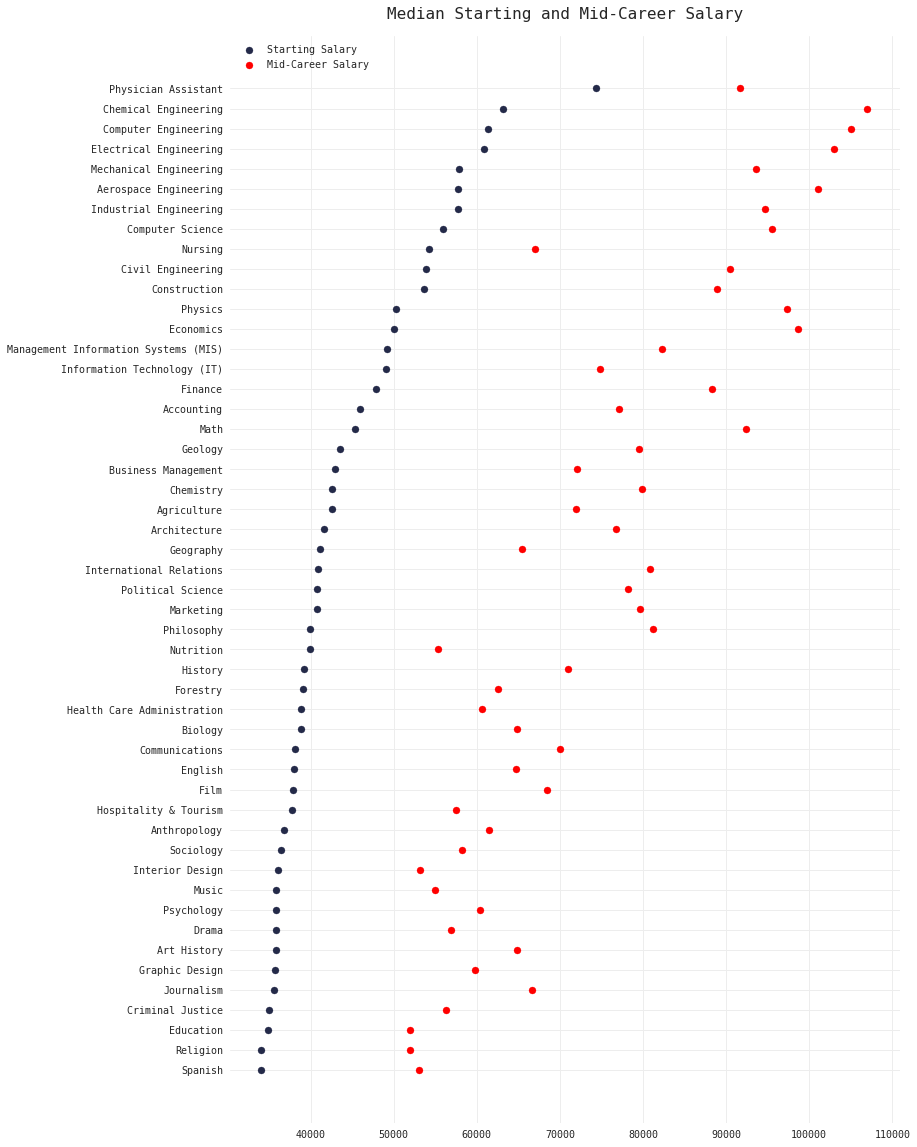

In [50]:
plt.figure(figsize=(12, 20))
plt.scatter(df['Bgn50'].values, range(df['Bgn50'].shape[0]), color=MC,
           label='Starting Salary')
plt.yticks(range(df['Bgn50'].shape[0]), df['Bgn50'].index);
# plt.legend('Starting Salary')

plt.scatter(df['Mid50'].values, range(df['Bgn50'].shape[0]), color='red',
           label='Mid-Career Salary')
plt.yticks(range(df['Mid50'].shape[0]), df['Mid50'].index);

plt.legend(loc='upper left')
plt.title('Median Starting and Mid-Career Salary', y=1.01);


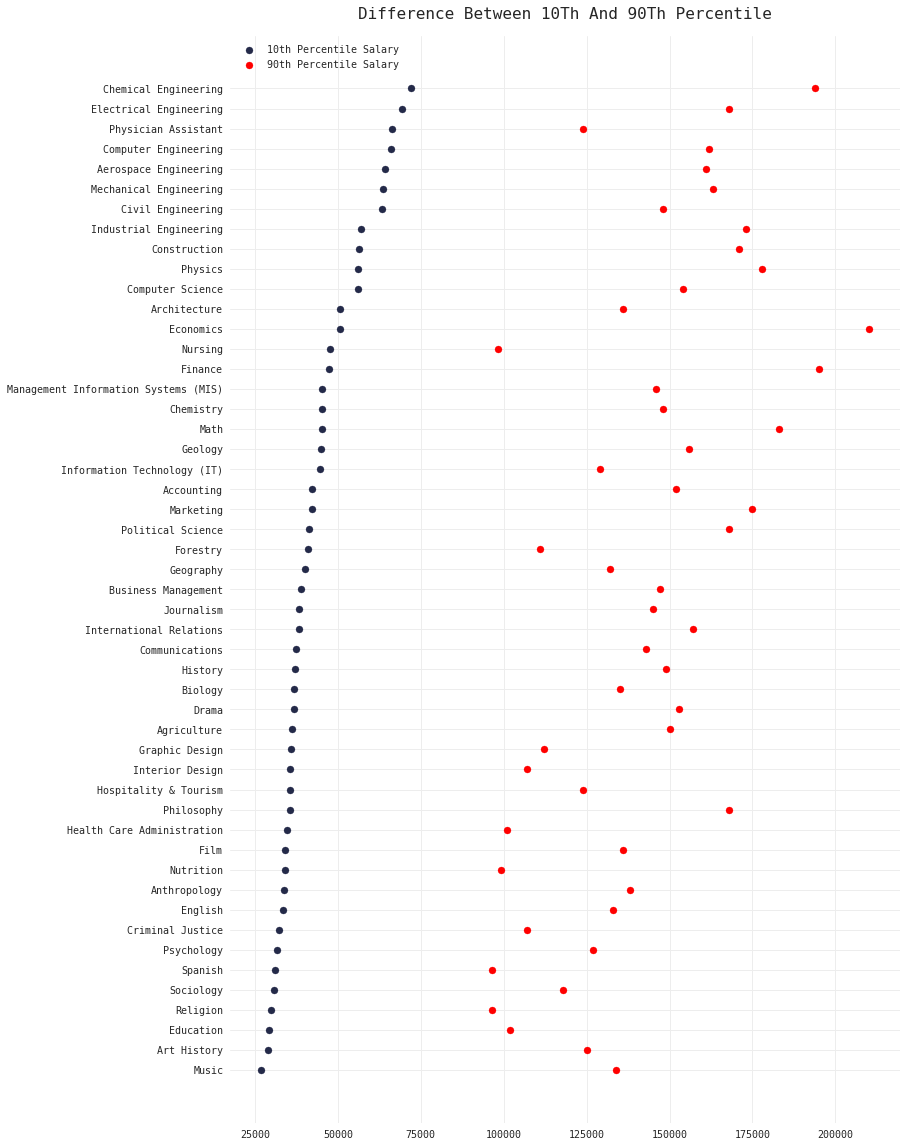

In [53]:
temp_df = df.sort_values('Mid10')

plt.figure(figsize=(12, 20))

plt.scatter(temp_df['Mid10'].values, range(temp_df['Mid10'].shape[0]), color=MC,
           label='10th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.scatter(temp_df['Mid90'].values, range(temp_df['Mid90'].shape[0]), color='red',
           label='90th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.legend(loc='upper left')
plt.title('Difference between 10th and 90th percentile'.title(), y=1.01);